In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold
from keras.models import Model, Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
from ipynb.fs.full.DatasetManage import read_and_store_data
from ipynb.fs.full.FeatureExtraction import feature_extraction
from ipynb.fs.full.ClassificationPerformanceIndexes import classificationPerformanceIndexes, printClassificationPerformanceIndexes
from ipynb.fs.full.ClassificationMethods import CompleteLSTM

Parameter

In [3]:
perfInd = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'Kappa', 'Time']
channels = ['FP1-F7', 'F7-T7','T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'seizure']

dataset = 'CHB_MIT'
csvImportFile = 'CHB.csv'
csvExportFile = 'CHB.csv'
sample_rate = 256
time_window = 2
step = time_window * sample_rate

test_ratio = 0.3

pca_tolerance = 0.9

undersampling_rate = 0.2

oversampling_neighbors = 11

k_fold = 5

csvAverageFile = 'Features.csv'

batch = 10
epochs = 100
dropout_percentage = 0.2
loss_function = 'mean_squared_error'
metric = 'accuracy'

Create Training and Test Data

In [4]:
def trainTestData (features, test_ratio, k_fold, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, shuffle = True)
    results = pd.DataFrame(columns = perfInd)
    kf = KFold(n_splits = k_fold, shuffle = True)
    return x_train, x_test, y_train, y_test, results, kf

Read and Store Data

In [5]:
print('Reading data from', csvImportFile)
df = pd.read_csv(csvImportFile, delimiter = ',', header = 0)

Reading data from CHB.csv


Feature Extraction 

In [6]:
# ft = feature_extraction(df, sample_rate, step, pca_tolerance, undersampling_rate, oversampling_neighbors)

Train and Test process

In [7]:
ft = pd.read_csv(csvAverageFile, delimiter = ',', header = 0)

In [8]:
x_train, x_test, y_train, y_test, results, kf = trainTestData (ft, test_ratio, k_fold, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

1D Convolutional Model

In [ ]:
# Definizione dell'architettura della rete neurale

num_classes = 2
input_channels = 86

model = tf.keras.Sequential()
model.add(layers.Conv1D(8, 12, activation='relu', input_shape=(None, input_channels)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer='rmsprop', loss='mae')

# Training 

# X_train = X_train.reshape(-1, input_length, input_channels)

num_epochs = 20
batch_size = 2
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Evaluation of the model

# X_test = X_test.reshape(-1, input_length, input_channels)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

# Utilizzo del modello per effettuare predizioni
predictions = model.predict(x_test)


1D CN

In [ ]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, ft.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit(x_train,
                    steps_per_epoch=350,
                    epochs=20)

GRU

Epoch 1/20
500/500 [==============================] - 2s 2ms/step - loss: 0.3025
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1852
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1418
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1244
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1074
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1016
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0878
Epoch 8/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0858
Epoch 9/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0793
Epoch 10/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0710
Epoch 11/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0696
Epoch 12/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0659
Epoch 13/20
500/500 [====

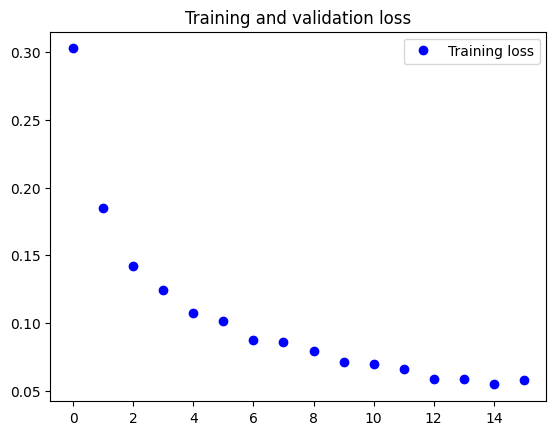

NameError: name 'float_data' is not defined

In [37]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=20)

# Plot

loss = history.history['loss']
acc = history.history['acc']
epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, acc, '', label='Training accuracy')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Dropout

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=40,
                    validation_data=val_gen)

# Plot 

loss = history.history['loss']
acc = history.history['acc']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.title('Training loss and accuracy with dropout')
plt.legend()

plt.show()

RNN

LSTM 

In [ ]:
lstm_units = 128
dense_units = 32  

CompleteLSTM(x_train, x_test, y_train, y_test, results, ft, kf, perfInd, epochs, batch, lstm_units, dense_units, dropout_percentage, loss_function, metric)